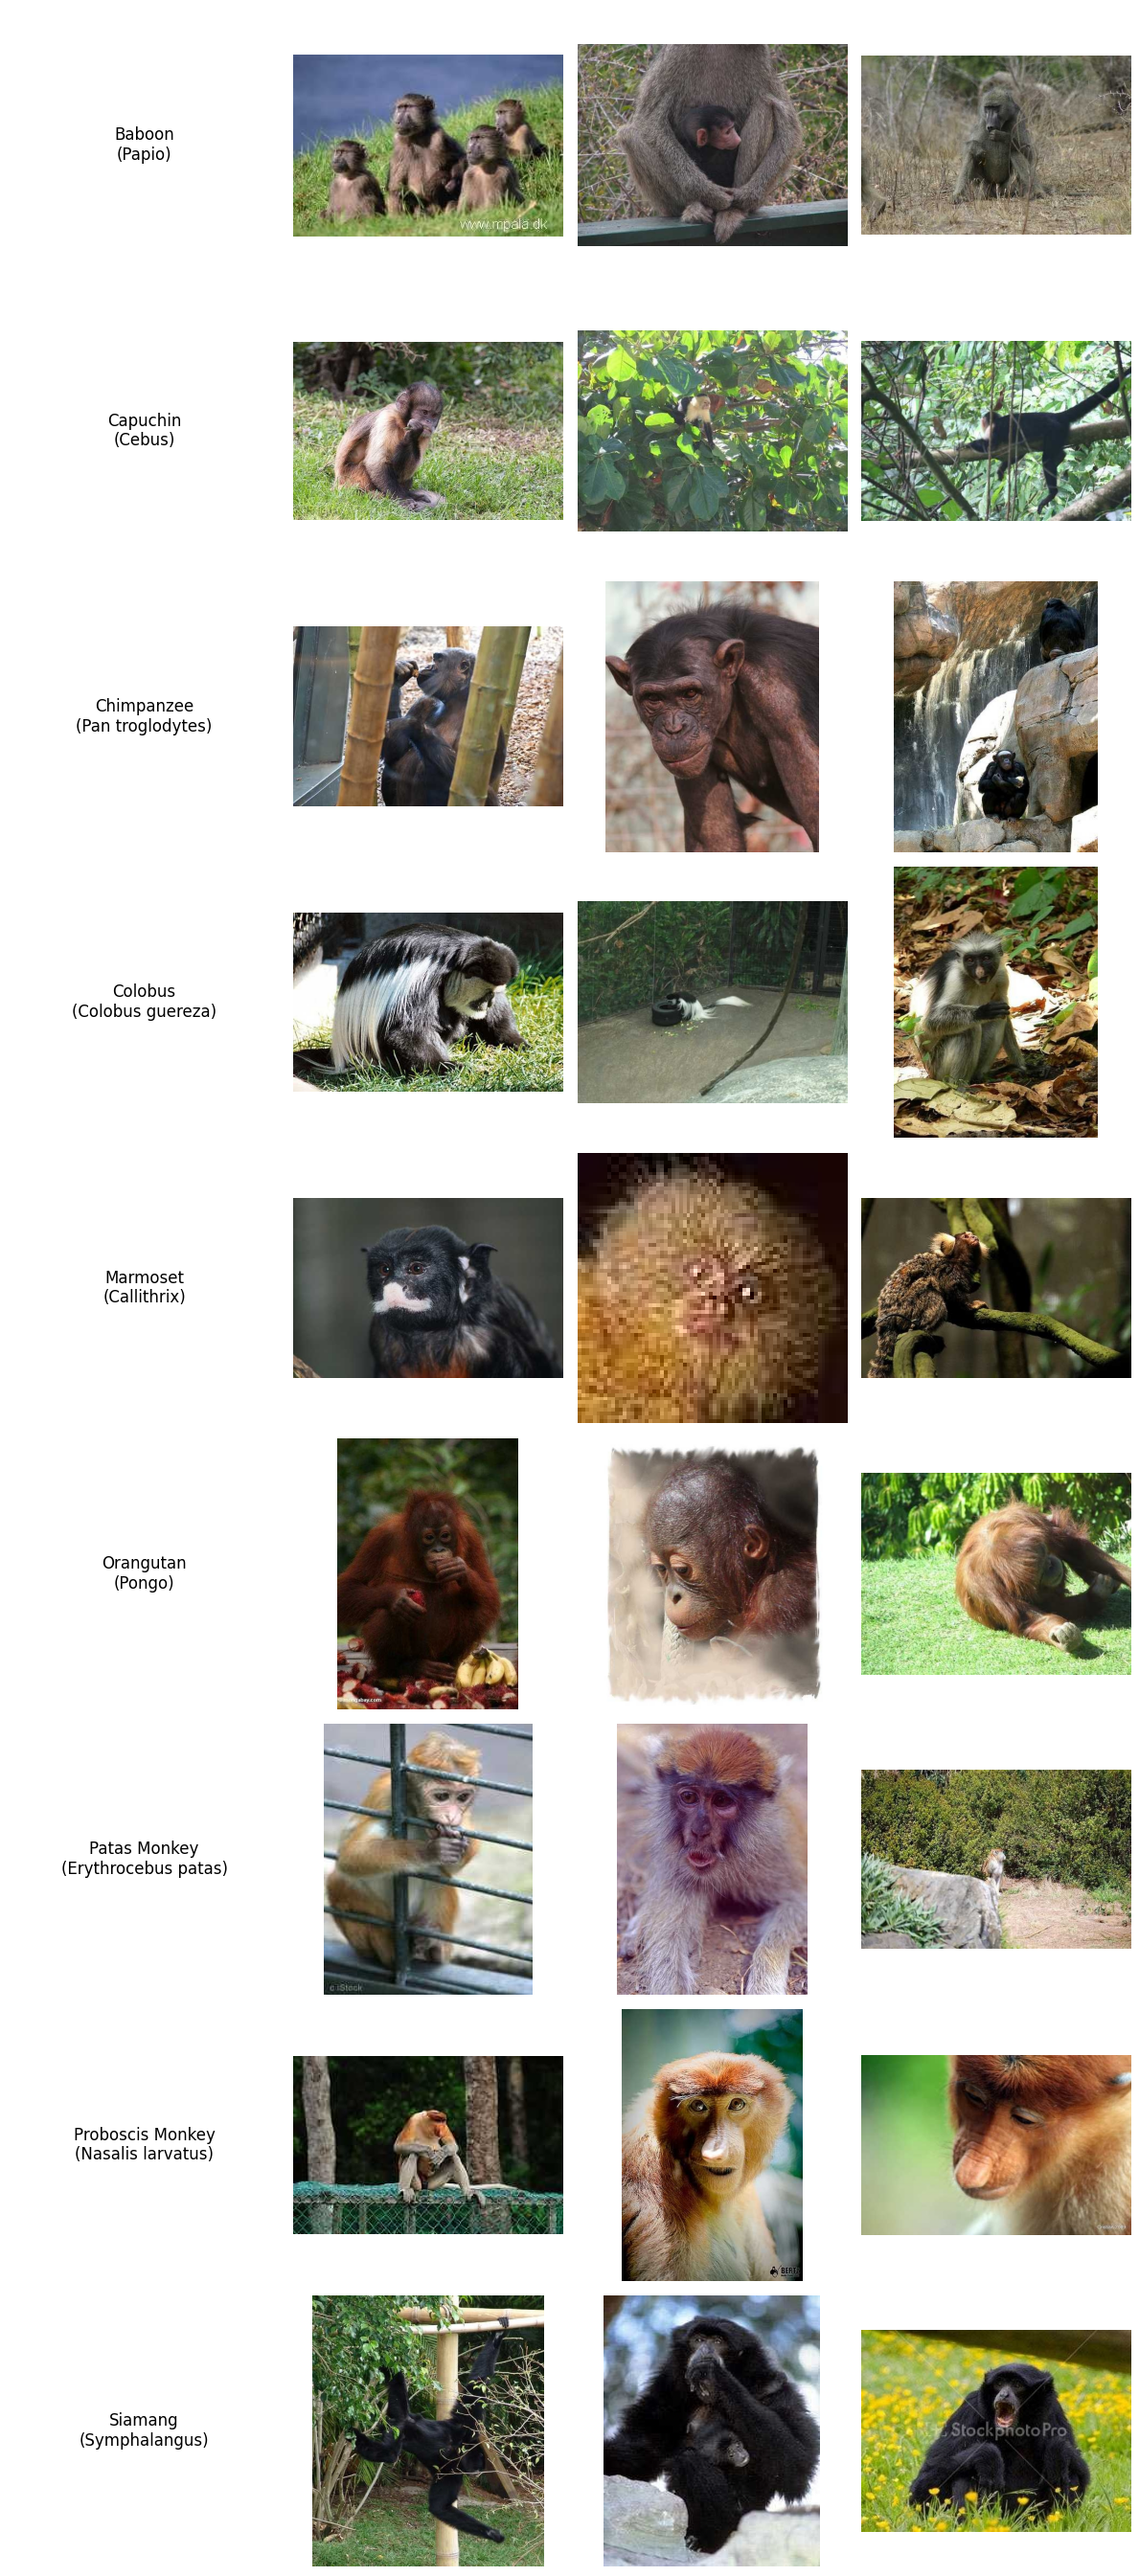

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Define your dataset path
train_dir = "/kaggle/input/monkey5/MonkeyDataSet - Copy/training/training"

# Define species mapping
species_data = {
    "n0": {"Common Name": "Baboon", "Scientific Name": "Papio"},
    "n1": {"Common Name": "Capuchin", "Scientific Name": "Cebus"},
    "n2": {"Common Name": "Chimpanzee", "Scientific Name": "Pan troglodytes"},
    "n3": {"Common Name": "Colobus", "Scientific Name": "Colobus guereza"},
    "n4": {"Common Name": "Marmoset", "Scientific Name": "Callithrix"},
    "n5": {"Common Name": "Orangutan", "Scientific Name": "Pongo"},
    "n6": {"Common Name": "Patas Monkey", "Scientific Name": "Erythrocebus patas"},
    "n7": {"Common Name": "Proboscis Monkey", "Scientific Name": "Nasalis larvatus"},
    "n8": {"Common Name": "Siamang", "Scientific Name": "Symphalangus"}
}

species_images = {}

# Collect first three images per species
for species, species_info in species_data.items():
    species_path = os.path.join(train_dir, species)
    if os.path.isdir(species_path):
        image_files = [f for f in os.listdir(species_path) if f.endswith(('jpg', 'png', 'jpeg'))][:3]
        if image_files:
            species_images[species_info["Common Name"]] = [cv2.imread(os.path.join(species_path, img)) for img in image_files]
        else:
            print(f"Warning: No images found for {species_info['Common Name']} in {species_path}")

num_species = len(species_images)

# Check if any images were found
if num_species == 0:
    print("Error: No images found in the dataset. Check dataset path and structure.")
else:
    fig, axs = plt.subplots(num_species, 4, figsize=(12, 3 * num_species))

    for i, (species_name, images) in enumerate(species_images.items()):
        # First column: Species name
        axs[i, 0].text(0.5, 0.5, f"{species_name}\n({species_data[f'n{i}']['Scientific Name']})", fontsize=12, ha='center', va='center')
        axs[i, 0].axis('off')
        
        # Next three columns: Images
        for j in range(3):
            if j < len(images) and images[j] is not None:
                axs[i, j + 1].imshow(cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB))
            axs[i, j + 1].axis('off')

    plt.tight_layout()
    plt.show()


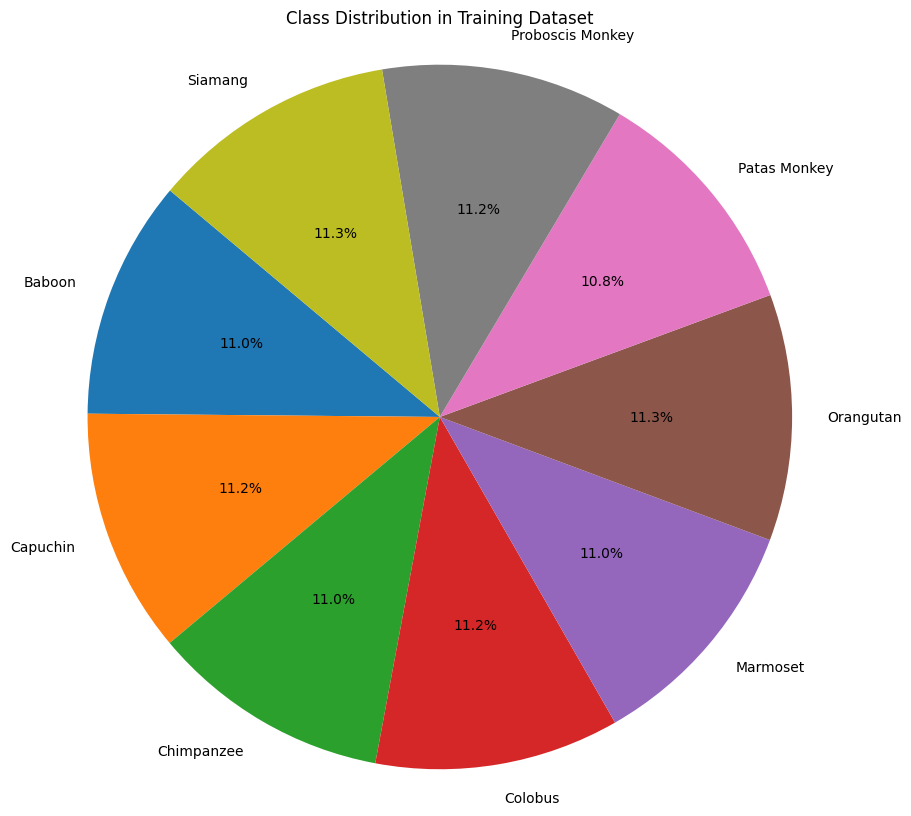

In [2]:
import os
import matplotlib.pyplot as plt

# Define the path to the training dataset
train_dir = "/kaggle/input/monkey5/MonkeyDataSet - Copy/training/training"

# Mapping of folder labels to common names
label_to_common_name = {
    "n0": "Baboon",
    "n1": "Capuchin",
    "n2": "Chimpanzee",
    "n3": "Colobus",
    "n4": "Marmoset",
    "n5": "Orangutan",
    "n6": "Patas Monkey",
    "n7": "Proboscis Monkey",
    "n8": "Siamang"
}

# Get class names and count images in each folder
monkey_species = []
training_counts = []

for species in sorted(os.listdir(train_dir)):  # Sort for consistency
    species_path = os.path.join(train_dir, species)
    if os.path.isdir(species_path):  # Ensure it's a directory
        num_images = len([f for f in os.listdir(species_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        common_name = label_to_common_name.get(species, species)  # Use common name if available
        monkey_species.append(common_name)
        training_counts.append(num_images)

# Define distinct colors (using a seaborn color palette for variety)
colors = plt.get_cmap('tab10')(range(len(monkey_species)))  # 'tab10' provides 10 distinct colors

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(training_counts, labels=monkey_species, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Class Distribution in Training Dataset")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular

# Show the plot
plt.show()


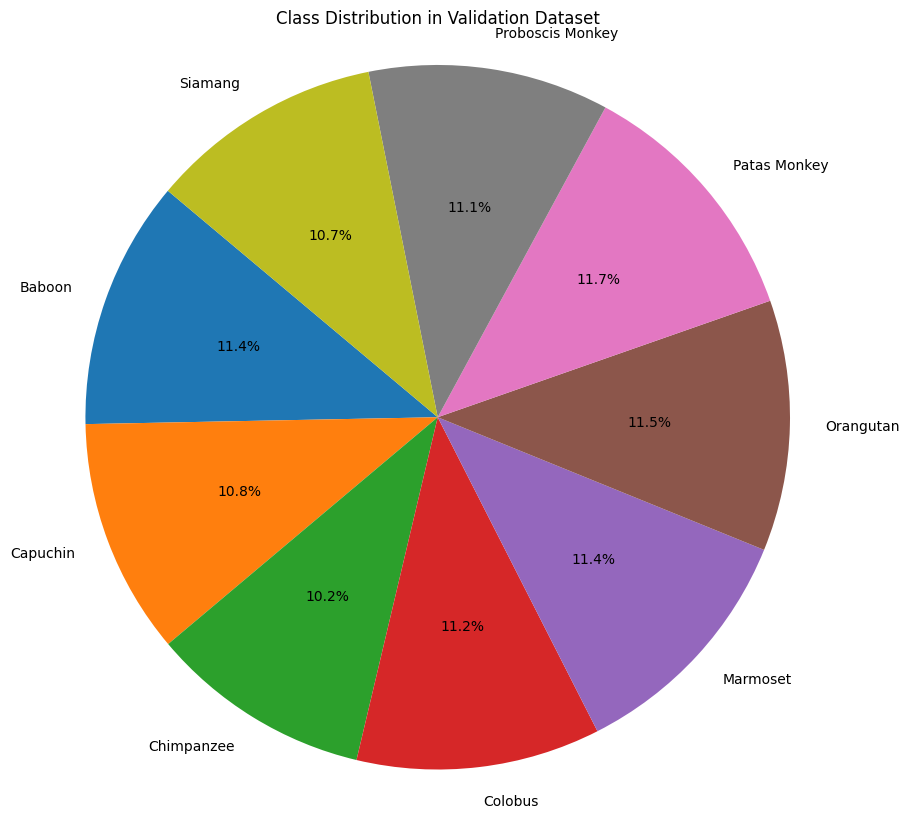

In [3]:
import os
import matplotlib.pyplot as plt

# Define the path to the training dataset
train_dir = "/kaggle/input/monkey5/MonkeyDataSet - Copy/testing/testing"

# Mapping of folder labels to common names
label_to_common_name = {
    "n0": "Baboon",
    "n1": "Capuchin",
    "n2": "Chimpanzee",
    "n3": "Colobus",
    "n4": "Marmoset",
    "n5": "Orangutan",
    "n6": "Patas Monkey",
    "n7": "Proboscis Monkey",
    "n8": "Siamang"
}

# Get class names and count images in each folder
monkey_species = []
training_counts = []

for species in sorted(os.listdir(train_dir)):  # Sort for consistency
    species_path = os.path.join(train_dir, species)
    if os.path.isdir(species_path):  # Ensure it's a directory
        num_images = len([f for f in os.listdir(species_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        common_name = label_to_common_name.get(species, species)  # Use common name if available
        monkey_species.append(common_name)
        training_counts.append(num_images)

# Define distinct colors (using a seaborn color palette for variety)
colors = plt.get_cmap('tab10')(range(len(monkey_species)))  # 'tab10' provides 10 distinct colors

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(training_counts, labels=monkey_species, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Class Distribution in Validation Dataset")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular

# Show the plot
plt.show()


Loading training dataset...
Loading testing dataset...
Classes: ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']
Training data size: 6996, Testing data size: 3493
Computed class weights: {0: 1.0134724033029119, 1: 0.9889737065309584, 2: 1.0121527777777777, 3: 0.9902335456475584, 4: 1.0069084628670122, 5: 0.9827222924568058, 6: 1.0255057167985928, 7: 0.9953051643192489, 8: 0.9864636209813875}
Training the model...
Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.5159 - loss: 11.0662Epoch 1: Loss = 10.1911, Accuracy = 0.7310
110/110 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.5178 - loss: 11.0583 - val_accuracy: 0.9433 - val_loss: 9.1806
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.9055 - loss: 9.1297Epoch 2: Loss = 8.9682, Accuracy = 0.9087
110/110 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9055 - loss: 9.1282 - val_accuracy: 0.9485 - val_loss: 8.5628
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.9159 - loss:

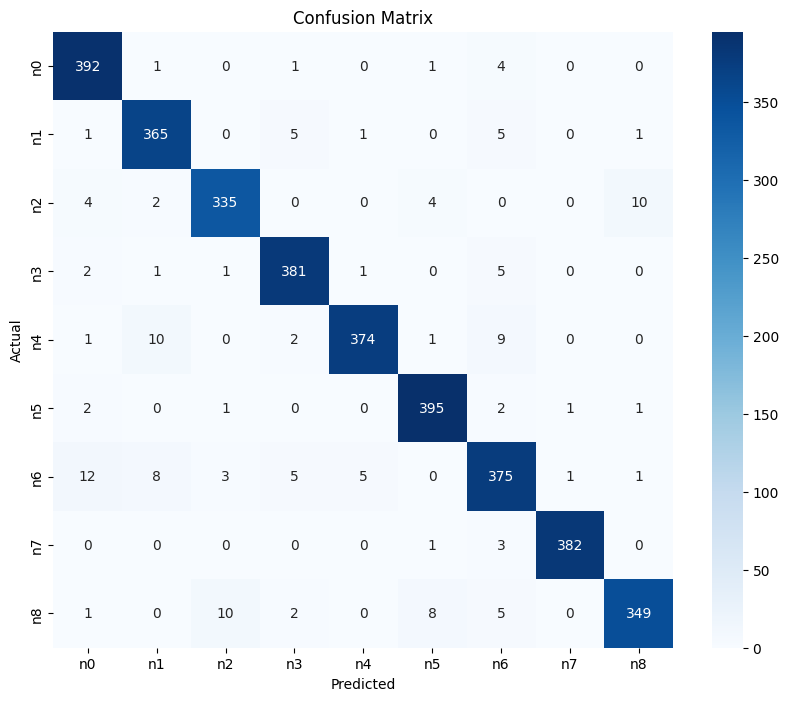

Plotting training history...


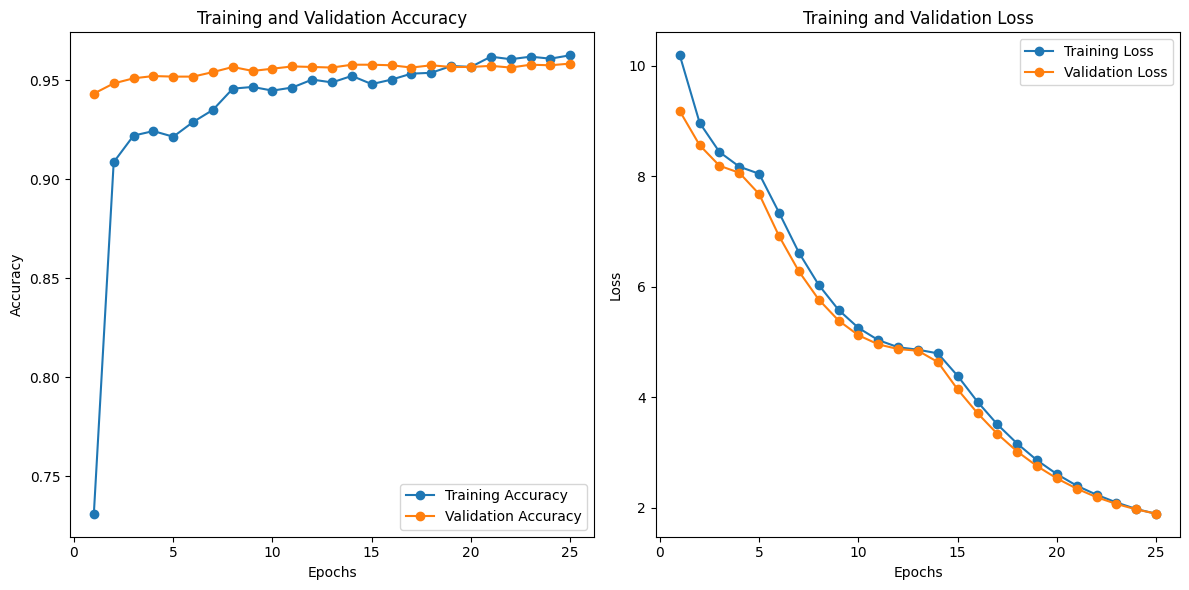

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy

# ============== 1. Helper Functions ==============

def preprocess_data(image_path, target_size=(224, 224)):
    """Preprocess a single image for model input."""
    img = tf.keras.utils.load_img(image_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

def prepare_dataset(folder_path, target_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted([entry.name for entry in folder_path.iterdir() if entry.is_dir()])

    for folder in folder_path.iterdir():
        if folder.is_dir():
            for img_path in folder.iterdir():
                try:
                    img_array = preprocess_data(img_path, target_size)
                    images.append(img_array)
                    labels.append(class_names.index(folder.name))
                except Exception as e:
                    print(f"Skipping file {img_path} due to error: {e}")

    return np.array(images), to_categorical(labels), class_names

def plot_training_history(history):
    """Plot training and validation accuracy and loss over epochs."""
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ============== 2. Model Definition ==============

def weighted_categorical_crossentropy(weights):
    """Custom weighted categorical cross-entropy loss."""
    def loss(y_true, y_pred):
        weights_tensor = tf.constant(weights, dtype=tf.float32)
        weights_tensor = tf.gather(weights_tensor, tf.argmax(y_true, axis=-1))
        return tf.reduce_mean(weights_tensor * CategoricalCrossentropy()(y_true, y_pred))
    return loss

class PretrainedViT(tf.keras.Model):
    """Custom Vision Transformer model using TensorFlow Hub."""
    def __init__(self, num_classes, vit_model_url):
        super().__init__()
        self.data_augmentation = tf.keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        self.vit_model = hub.KerasLayer(vit_model_url, trainable=False)
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.dropout = layers.Dropout(0.5)
        self.fc2 = layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.classifier = layers.Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.data_augmentation(inputs, training=training)
        x = self.vit_model(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x, training=training)
        x = self.fc2(x)
        return self.classifier(x)

def create_and_compile_model(input_shape, num_classes, class_weights):
    """Initialize and compile the ViT-based model."""
    vit_model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
    model = PretrainedViT(num_classes, vit_model_url)

    # Cosine decay with warm restarts
    lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
        initial_learning_rate=0.0001,
        first_decay_steps=500,
        t_mul=2.0,
        m_mul=0.9,
        alpha=0.01
    )

    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr_schedule)

    # Custom loss function with class weights
    weights = [class_weights[i] for i in range(len(class_weights))]
    model.compile(
        optimizer=optimizer,
        loss=weighted_categorical_crossentropy(weights),
        metrics=["accuracy"]
    )

    return model

# ============== 3. Callbacks ==============

class DebugCallback(tf.keras.callbacks.Callback):
    """Callback to log loss and accuracy during training."""
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")

# ============== 4. Evaluation Utilities ==============

def evaluate_model(model, X_test, y_test, class_names):
    """Evaluate the model and visualize metrics."""
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# ============== 5. Main Function ==============

def main():
    """Main pipeline for training and evaluating the model."""
    # Define paths for Kaggle datasets
    train_path = Path("/kaggle/input/monkey5/MonkeyDataSet - Copy/training/training")
    test_path = Path("/kaggle/input/monkey5/MonkeyDataSet - Copy/testing/testing")

    # Prepare datasets
    print("Loading training dataset...")
    X_train, y_train, train_class_names = prepare_dataset(train_path)
    print("Loading testing dataset...")
    X_test, y_test, test_class_names = prepare_dataset(test_path)

    # Ensure the number of classes is correct
    assert len(train_class_names) == len(test_class_names), "Training and testing datasets have mismatched class names."

    # Print class names and counts
    print(f"Classes: {train_class_names}")
    print(f"Training data size: {len(X_train)}, Testing data size: {len(X_test)}")

    # Class weights to handle class imbalance
    y_train_classes = np.argmax(y_train, axis=1)
    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=np.unique(y_train_classes),
        y=y_train_classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights)}
    print(f"Computed class weights: {class_weights}")

    # Initialize model
    input_shape = (224, 224, 3)
    num_classes = len(train_class_names)
    model = create_and_compile_model(input_shape, num_classes, class_weights)

    # Callbacks
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    debug_callback = DebugCallback()

    # Training
    print("Training the model...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=25,
        batch_size=64,
        class_weight=class_weights,
        callbacks=[early_stopping, debug_callback]
    )

    # Evaluation
    print("Evaluating the model...")
    evaluate_model(model, X_test, y_test, train_class_names)

    # Plot training history
    print("Plotting training history...")
    plot_training_history(history)

if __name__ == "__main__":
    main()


In [6]:
def print_model_summary(input_shape, num_classes):
    """Initialize the ViT model and print its summary without training."""
    vit_model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
    model = PretrainedViT(num_classes, vit_model_url)
    model.build(input_shape=(None, *input_shape))  # Explicitly build model for summary
    model.summary()

# Example usage
input_shape = (224, 224, 3)
num_classes = 9  # Adjust based on your dataset
print_model_summary(input_shape, num_classes)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'pretrained_vi_t_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "pretrained_vi_t_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)